A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.


● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.


● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Import needed data set
df = pd.read_csv(r'Downloads\sales_add.csv')

In [21]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [38]:
df.shape

(22, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [23]:
df.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [24]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [25]:
#1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
df1 = df.groupby('Region', as_index=False).sum()

In [26]:
df1.head()

,Region,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Region - A,1482049,2388531
1,Region - B,1053665,1601095
2,Region - C,747565,1095096


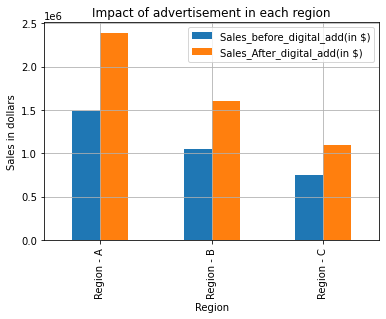

In [37]:
#The sales Before and After
df1.plot(x='Region',y=['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'],kind='bar')
plt.title('Impact of advertisement in each region')
plt.xlabel('Region')
plt.ylabel('Sales in dollars')
plt.grid()
plt.show()

From the above data there is a good impact occurs in each reagion A,B,C after the company changes into digital marketing

In [28]:
## calculating each regions increase in sales in percentage.
rega=round(((df1['Sales_After_digital_add(in $)'][0]-df1['Sales_before_digital_add(in $)'][0])/df1['Sales_before_digital_add(in $)'][0])*100,2)
regb=round(((df1['Sales_After_digital_add(in $)'][1]-df1['Sales_before_digital_add(in $)'][1])/df1['Sales_before_digital_add(in $)'][1])*100,2)
regc=round(((df1['Sales_After_digital_add(in $)'][2]-df1['Sales_before_digital_add(in $)'][2])/df1['Sales_before_digital_add(in $)'][2])*100,2)

In [29]:
print("Advertisment in region A has resulted in",rega,"percent increase in sales.")
print("Advertisment in region B has resulted in",regb,"percent increase in sales.")
print("Advertisment in region C has resulted in",regc,"percent increase in sales.")

Advertisment in region A has resulted in 61.16 percent increase in sales.
Advertisment in region B has resulted in 51.95 percent increase in sales.
Advertisment in region C has resulted in 46.49 percent increase in sales.


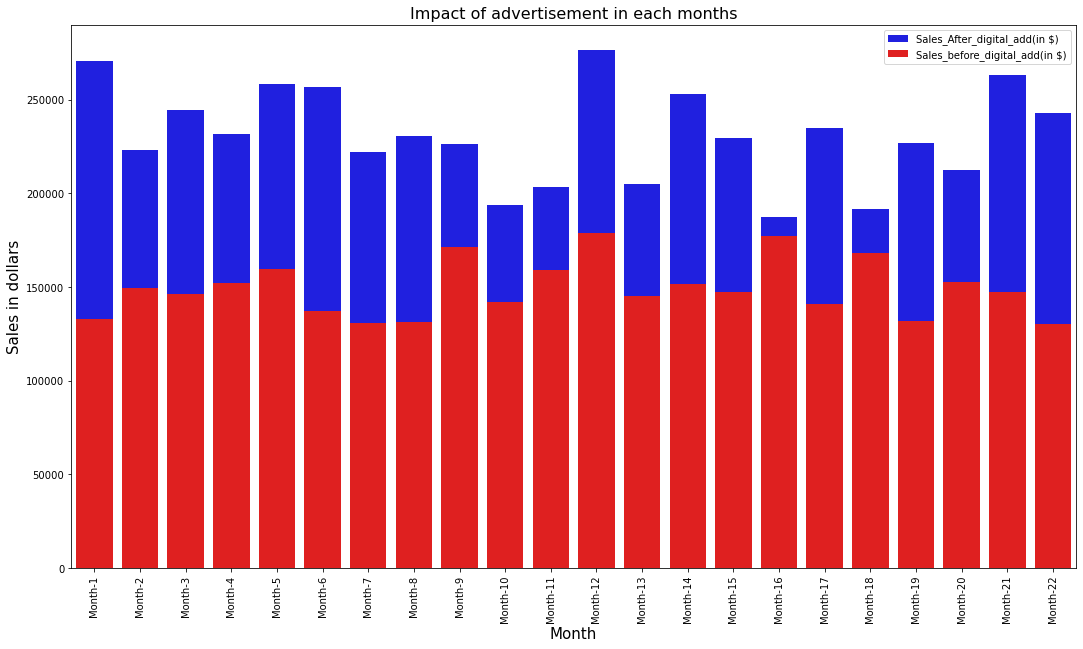

In [40]:
## Impact of sales in months before and after advertisement.
ax = plt.subplots(figsize=(18,10))
# Plotting columns
ax = sns.barplot(x ='Month',y ='Sales_After_digital_add(in $)',label='Sales_After_digital_add(in $)',data = df,color = 'Blue')
ax = sns.barplot(x ='Month',y ='Sales_before_digital_add(in $)',label='Sales_before_digital_add(in $)',data = df,color='Red')
plt.title("Impact of advertisement in each months",fontsize=16)  
# Renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
ax.legend()
plt.xlabel("Month",fontsize=15)
plt.ylabel("Sales in dollars",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Advertisement has resulted in increase in sales in all regions and all the months

In [31]:
## loading chi2_contingency
from scipy.stats import chi2_contingency

In [32]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df1.Region, df.Manager))

In [33]:
## the test statistic.
c

3.0

In [34]:
## degree of freedom
dof

2

In [35]:
## expected frequencies
expected

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [36]:
## p value
p

0.22313016014842982

P value is greather than 0.05 therefore we cannot neglect NULL hypothesis which stated they are independent. We falied to find evidence against the NULL hypothesis. So they tends to be independent.